In [7]:
import preprocess as pre
import postprocess as post
import neurnet as neur
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# split training and test data
ytrain, ytest, Xtrain, Xtest = pre.splitTrainTest(
    traindata='data/mnist_train.csv', 
    testdata='data/mnist_test.csv')

In [4]:
# rescale X to [0.01 - 1]
Xtrain, Xtest = pre.rescaleX(Xtrain, Xtest)

# one-hot encode y
ytrain_onehot, ytest_onehot = pre.onehoty(ytrain, ytest)

# rescale onehot-encoded y to [0.01 - 1]
ytrain_onehot, ytest_onehot = pre.rescaley(ytrain_onehot, ytest_onehot)

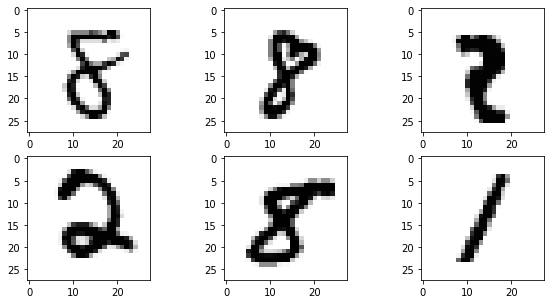

In [10]:
# plot some random training examples
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(Xtrain[np.random.randint(0, len(Xtrain))].reshape((28, 28)), cmap = 'Greys')
plt.show()

In [11]:
# create network, 1 hidden layer
nn1 = neur.NeuralNetwork(
    network_structure=[28*28, 50, 10], 
    learning_rate = 0.1)

In [12]:
# train manually
for i in range(len(Xtrain)):
    nn1.train(Xtrain[i], ytrain_onehot[i])

In [16]:
# look at some random predictions with test data
ypred_label = []
ypred_max_activation = []
index = np.random.randint(0, len(Xtest), 10)
for i in index:
    ypred_act = nn1.predict(Xtest[i])
    ypred_label.append(np.argmax(ypred_act))
    ypred_max_activation.append(np.max(ypred_act))
pd.DataFrame({'label': np.array(ytest[index]).astype('int'), 'pred.': ypred_label, 'activation': ypred_max_activation})

,label,pred.,activation
0,4,4,0.706340
1,1,1,0.989884
2,3,3,0.845617
3,2,2,0.973914
4,6,6,0.921479
5,0,0,0.987079
6,6,6,0.982890
7,8,8,0.830078
8,6,6,0.991444
9,4,4,0.951548


In [21]:
# compute and print out quality indicators
confusion_matrix, precision, recall, corrects, wrongs = nn1.quality(Xtest, ytest)
pd.DataFrame({'label': np.arange(0, 10), 'precision': precision, 'recall': recall})

,label,precision,recall
0,0,0.945098,0.983673
1,1,0.960447,0.984141
2,2,0.968444,0.862403
3,3,0.879927,0.950495
4,4,0.939857,0.938900
5,5,0.948931,0.895740
6,6,0.939919,0.963466
7,7,0.974576,0.894942
8,8,0.907801,0.919918
9,9,0.896359,0.951437


In [ ]:
# save training and testing quality indicators
post.computesavequality(X=Xtrain, y=ytrain, model=nn1, outfileprefix='train_')
post.computesavequality(X=Xtest, y=ytest, model=nn1, outfileprefix='test_')

In [ ]:
# next:
# batches and epochs in training